In [1]:
import pickle
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(context='paper',font_scale=1.75,style='whitegrid')
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
########################## Functions to create accuracy tables #######################################
def temp_acc(temporal,roi):
    temp_acc = pd.DataFrame.from_dict({(i,j,k): temporal[i][j][k]
                                    for i in temporal
                                    for j in temporal[i]
                                    for k in temporal[i][j]}).T.reset_index()
    temp_acc.rename(columns={'level_0':'fold','level_1':'TR','level_2':'set',0:'acc'},inplace=True)
    temp_acc.drop('fold',axis=1,inplace=True)
    temp_acc['TR'] =temp_acc['TR'].apply(lambda x: float(x[2:]))
    temp_acc['data'] = roi
    return temp_acc

def overall_acc(overall,roi,test):
    OA_acc = pd.DataFrame.from_dict({(i,j): overall[i][j]
                                    for i in overall
                                    for j in overall[i]}).T.reset_index()
    OA_acc.rename(columns={'level_0':'fold','level_1':'set',0:'acc'},inplace=True)
    OA_acc.drop('fold',axis=1,inplace=True)
    OA_acc['data'] = roi
    OA_acc = pd.concat([OA_acc,pd.DataFrame(['test',test['test'],roi],
                                                  index=['set','acc','data']).T],
                        axis=0,
                        ignore_index=True)
    return OA_acc


########################### Fnctions to plot accuracies ################################################
def plot_temporal_acc(_temporal):
    
    plt.figure(figsize=(8,6))
    sns.barplot(x='TR',y='acc',data=_temporal, hue='set',capsize=0.15,ci='sd')
    #sns.lineplot(x='TR',y='acc',data=_temporal,
    #             hue='set',
    #             ci='sd',
    #             err_style="bars",
    #             linewidth=3, err_kws=dict(elinewidth=3,
    #                                       capsize=5,capthick=3))
    plt.legend(loc='upper right',bbox_to_anchor=[1.2,1])
    plt.axhline(y=0.5,linestyle='--',c='red')
    plt.ylim([0,1])
    plt.xlabel('Timepoint')
    plt.yticks(np.arange(0,1.1,0.1))
    plt.ylabel('Accuracy')
    _=plt.title(_temporal['data'].unique()[0])
    
    
def plot_overall_acc(_overall):
    plt.figure(figsize=(6,4))
    sns.barplot(x='set',y='acc',data=_overall,capsize=0.15,ci='sd')
    #plt.legend(loc='upper right',bbox_to_anchor=[1.2,1])
    plt.axhline(y=0.5,linestyle='--',c='red')
    plt.ylim([0,1])
    plt.yticks(np.arange(0,1.1,0.1))
    plt.ylabel('Accuracy')
    _=plt.title(_overall['data'].unique()[0])

# Whole brain (316 ROIs)
## Without convolutional layer

In [3]:
fname='accuracy_cv_perm_ROI316.pkl'
with open('results/{}'.format(fname),'rb') as f:
    accuracy_scores = pickle.load(f)
    
overall, temporal, rand, test = accuracy_scores

### Temporal accuracy

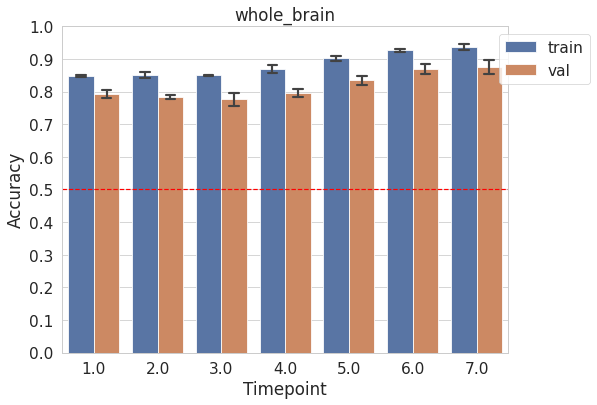

In [4]:
wb_temporal = temp_acc(temporal,'whole_brain')
plot_temporal_acc(wb_temporal)

### Overall accuracy

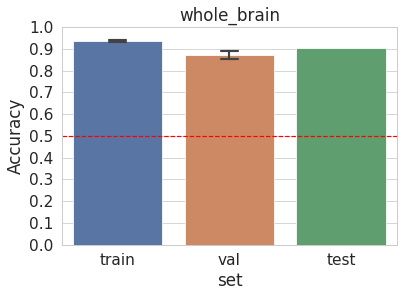

In [5]:
wb_overall = overall_acc(overall,'whole_brain',test)
plot_overall_acc(wb_overall)

### Permutation Accuracy

Test accuracy: Observed > Null (p = 0.0099)


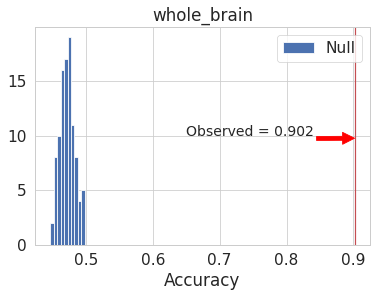

In [6]:
perm_test_acc_dist = np.asarray(rand['val'])

plt.hist(perm_test_acc_dist,bins=int(np.sqrt(len(perm_test_acc_dist))),label = 'Null')
_=plt.legend(loc='upper right')
_=plt.axvline(test['test'],c='r',label=None)
_=plt.xlabel('Accuracy')
_=plt.title('whole_brain')
plt.annotate('Observed = %.3f' %(test['test']),
             xy=(test['test'],9.75),
             xytext=(0.65,10),
             arrowprops={'color':'red'},
             fontsize=14)
p_val = (np.sum(perm_test_acc_dist > test['test'])+1)/(len(perm_test_acc_dist)+1)
print('Test accuracy: Observed > Null (p = %.4f)' %(p_val))

# Right ventro-anterior Insula

In [7]:
fname='accuracy_cv_perm_rAI.pkl'
with open('results/{}'.format(fname),'rb') as f:
    accuracy_scores = pickle.load(f)
overall, temporal, rand, test = accuracy_scores

### Temporal Accuracy

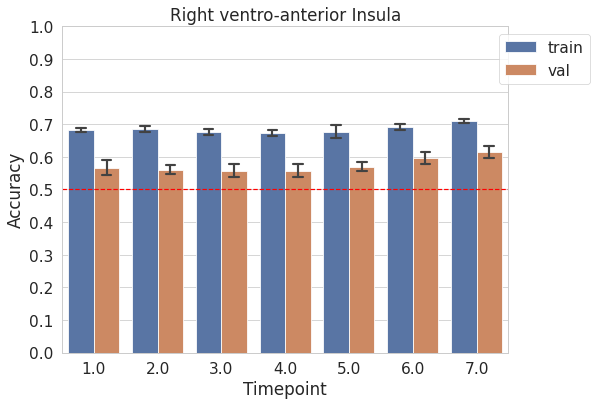

In [8]:
rAI_temporal = temp_acc(temporal,'Right ventro-anterior Insula')
plot_temporal_acc(rAI_temporal)

### Overall Accuracy

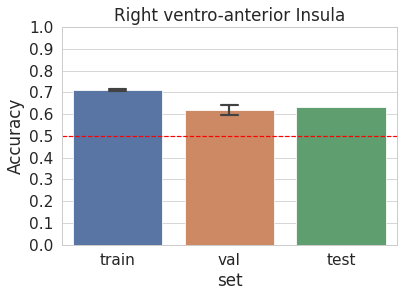

In [9]:
rAI_overall = overall_acc(overall,'Right ventro-anterior Insula',test)
plot_overall_acc(rAI_overall)

### Permutation Accuray

Test accuracy: Observed > Null (p = 0.0099)


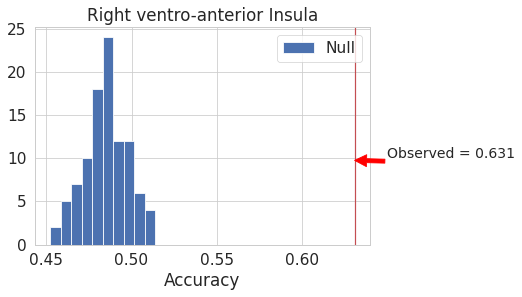

In [10]:
perm_test_acc_dist = np.asarray(rand['val'])

plt.hist(perm_test_acc_dist,bins=int(np.sqrt(len(perm_test_acc_dist))),label = 'Null')
_=plt.legend(loc='upper right')
_=plt.axvline(test['test'],c='r',label=None)
_=plt.xlabel('Accuracy')
_=plt.title('Right ventro-anterior Insula')
plt.annotate('Observed = %.3f' %(test['test']),
             xy=(test['test'],9.75),
             xytext=(0.65,10),
             arrowprops={'color':'red'},
             fontsize=14)
p_val = (np.sum(perm_test_acc_dist > test['test'])+1)/(len(perm_test_acc_dist)+1)
print('Test accuracy: Observed > Null (p = %.4f)' %(p_val))

# Overall Accuracies for all rAI and whole brain

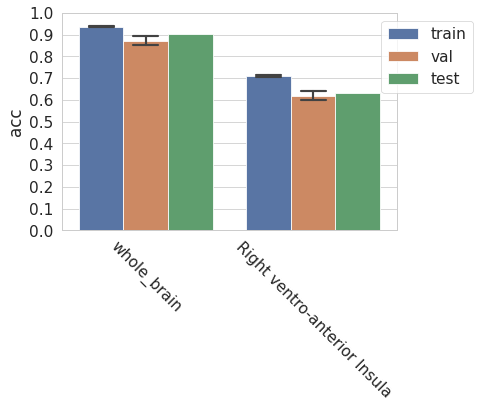

In [24]:
full_df = pd.concat([wb_overall,rAI_overall],axis=0,ignore_index=True)
sns.barplot(x='data',y='acc',data=full_df,hue='set',capsize=0.15,ci='sd')
plt.xticks(rotation=-45)
plt.xlabel(None)
plt.yticks(np.arange(0,1.1,0.1))
plt.legend(loc='upper right',bbox_to_anchor=[1.25,1])